# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
# Your code here. 

import pandas as pd

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

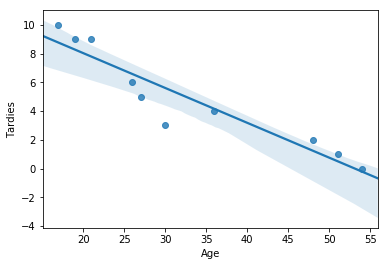

In [9]:
# Your code here.

%matplotlib inline
import seaborn as sns

sns.regplot(data=student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

# Apparently, the younger the student is, the higher number of tardies. The older, the lower.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [20]:
# Your response here.

import numpy as np

cov = np.cov(student_data['Age'], y=student_data['Tardies'])
cov


array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [14]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [24]:
# Your response here.

from scipy import stats
X = student_data['Age'] #independent variable
Y = student_data['Tardies'] #dependent variable

slope, intercept, r_value, p_value, std_error = stats.linregress(X,Y) 

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

#What will be your outcome variable? Tardies
#What type of regression are you using? Simple linear

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


Plot your regression model on your scatter plot.

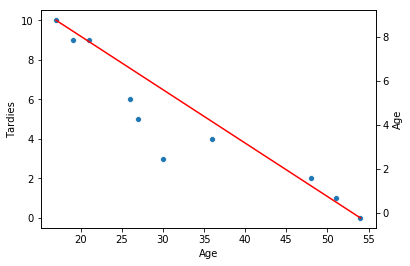

In [35]:
# Your code here.

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.scatterplot(data=student_data, x='Age', y='Tardies', ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=student_data, x='Age', y=(slope*student_data['Age'])+intercept, ax=ax2, color='r')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [39]:
# Your response here. 

print('R value: ',r_value)

#The regression line has a Rvalue of -0.93, which is very close to -1. Age is then a good predictor of Tardiness.

R value:  -0.9391626886887121


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [41]:
# Import any libraries you may need & the data

df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [59]:
# Your response here. 

corr_df = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

corr_df.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)

#The most important variable in determining CO2 emissions is Fuel Barrels/Year. 
#Also Fuel Cost/Year and Combined MPG are very good ones. 
#Cylinders is not bad

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [61]:
# Your response here. 


import statsmodels.api as sm

X_m = df[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = df['CO2 Emission Grams/Mile']

model = sm.OLS(Y,X_m)  

results = model.fit()
predictions = results.predict(X_m)

predictions

#I am using multiple linear regression with the 4 best variables according to correlation

0        514.613709
1        673.043388
2        547.365892
3        673.043388
4        566.909776
5        399.277307
6        367.699735
7        440.735148
8        399.277307
9        367.699735
10       440.735148
11       399.277307
12       367.699735
13       440.735148
14       452.888649
15       452.888649
16       479.124769
17       452.888649
18       479.124769
19       452.888649
20       479.124769
21       454.081070
22       434.699440
23       454.081070
24       434.699440
25       454.081070
26       454.081070
27       454.081070
28       434.699440
29       434.699440
            ...    
35922    827.048007
35923    827.048007
35924    340.421292
35925    367.699735
35926    382.881035
35927    353.587609
35928    340.421292
35929    340.421292
35930    353.587609
35931    353.587609
35932    253.684700
35933    253.684700
35934    253.684700
35935    253.684700
35936    253.684700
35937    253.684700
35938    261.356321
35939    269.372354
35940    253.684700


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [62]:
# Your response here. 

print(results.summary())

#Rsquared is 0.999, so the model accuracy is very high.

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.999
Model:                                 OLS   Adj. R-squared:                  0.999
Method:                      Least Squares   F-statistic:                 6.604e+06
Date:                     Thu, 12 Sep 2019   Prob (F-statistic):               0.00
Time:                             17:11:52   Log-Likelihood:            -1.5506e+05
No. Observations:                    35952   AIC:                         3.101e+05
Df Residuals:                        35948   BIC:                         3.102e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [63]:
# Your code here. 

party = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

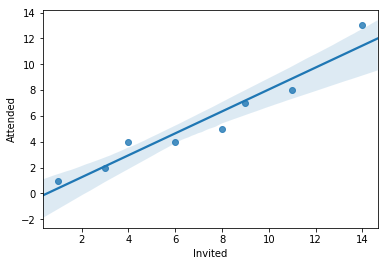

In [65]:
# Your code here.

sns.regplot(data=party, x='Invited', y='Attended')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


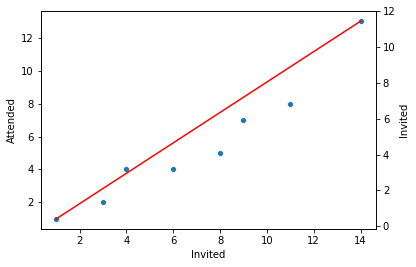

In [68]:
# Your response here. 

X = party['Invited'] #independent variable
Y = party['Attended'] #dependent variable

slope, intercept, r_value, p_value, std_error = stats.linregress(X,Y) 

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

fig, ax = plt.subplots()
sns.scatterplot(data=party, x='Invited', y='Attended', ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=party, x='Invited', y=(slope*party['Invited'])+intercept, ax=ax2, color='r')
plt.show()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 